# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 561


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
temperature_unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + temperature_unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | mehendiganj
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | sweetwater
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | pyoksong-up
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | gevrai
Processing Reco

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,28.07,76,25,3.46,MV,1690068974
1,mehendiganj,22.8167,90.5333,28.03,87,89,3.67,BD,1690068974
2,cabo san lucas,22.8909,-109.9124,37.01,55,0,3.60,MX,1690068939
3,codrington,-38.2667,141.9667,10.73,64,75,3.54,AU,1690068976
4,port-aux-francais,-49.3500,70.2167,3.67,73,75,11.88,TF,1690068977


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,28.07,76,25,3.46,MV,1690068974
1,mehendiganj,22.8167,90.5333,28.03,87,89,3.67,BD,1690068974
2,cabo san lucas,22.8909,-109.9124,37.01,55,0,3.60,MX,1690068939
3,codrington,-38.2667,141.9667,10.73,64,75,3.54,AU,1690068976
4,port-aux-francais,-49.3500,70.2167,3.67,73,75,11.88,TF,1690068977


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

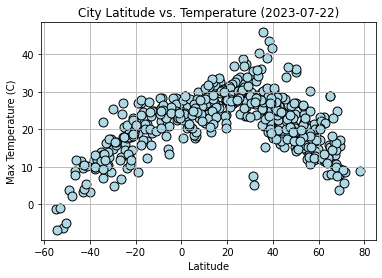

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],c= 'lightblue',marker = 'o',s = 80, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')

# Get today's date and append it to the title
today = date.today()
title = 'City Latitude vs. Temperature (' + str(today) + ')'
plt.title(title)

# To display grid in the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

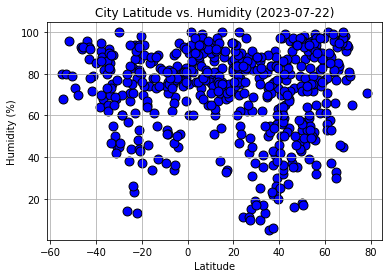

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],c= 'blue',marker = 'o', s = 80, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')

# Get today's date and append it to the title
today = date.today()
title = 'City Latitude vs. Humidity (' + str(today) + ')'
plt.title(title)

# To display grid in the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

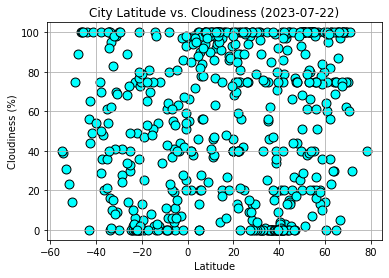

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],c= 'cyan',marker = 'o', s = 80, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')

# Get today's date and append it to the title
today = date.today()
title = 'City Latitude vs. Cloudiness (' + str(today) + ')'
plt.title(title)

# To display grid in the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

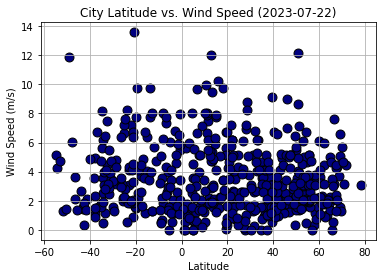

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],c= 'navy',marker = 'o', s = 80, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')

# Get today's date and append it to the title
today = date.today()
title = 'City Latitude vs. Wind Speed (' + str(today) + ')'
plt.title(title)

# To display grid in the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def compute_linear_regression(xvalue,yvalue,xlabel,ylabel,xcoord,ycoord):

    (slope, intercept,rvalue,pvalue,stderr) = linregress(xvalue,yvalue)
    regres = (slope * xvalue) + intercept
    print(f"The r-value is: {rvalue}")    
    plt.scatter(xvalue, yvalue) 

    # Incorporate the other graph properties
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # The linear regression expression to be displayed in the plot.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(xcoord,ycoord),fontsize=15,color="red")
    plt.plot(xvalue,regres,'r-')

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mehendiganj,22.8167,90.5333,28.03,87,89,3.67,BD,1690068974
2,cabo san lucas,22.8909,-109.9124,37.01,55,0,3.60,MX,1690068939
5,sweetwater,25.7634,-80.3731,34.00,62,75,4.12,US,1690068720
8,iqaluit,63.7506,-68.5145,7.85,81,75,1.03,CA,1690068978
11,pyoksong-up,38.0475,125.5567,25.96,91,99,3.63,KP,1690068981


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,28.07,76,25,3.46,MV,1690068974
3,codrington,-38.2667,141.9667,10.73,64,75,3.54,AU,1690068976
4,port-aux-francais,-49.3500,70.2167,3.67,73,75,11.88,TF,1690068977
6,hermanus,-34.4187,19.2345,9.89,83,100,3.54,ZA,1690068977
7,west island,-12.1568,96.8225,24.99,83,75,5.66,CC,1690068978


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5545604042479926


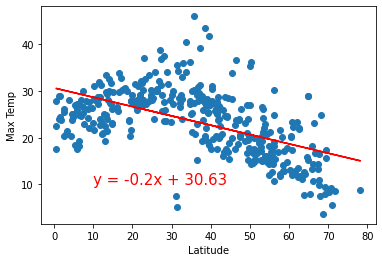

In [16]:
# Linear regression on Northern Hemisphere
compute_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp',10,10)

The r-value is: 0.8438680834240487


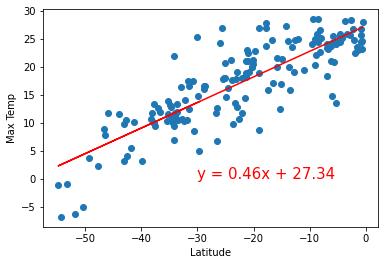

In [17]:
# Linear regression on Southern Hemisphere
compute_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp',-30,0)

**Discussion about the linear relationship:** 
The northern hemisphere has negative correlation between Latitude and Max Temperature. i.e as we move away from the equator the temperature decreases.
The southern hemisphere has positive correlation between Latitude and Max Temperature. i.e as we move towards the equator the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07550649013811958


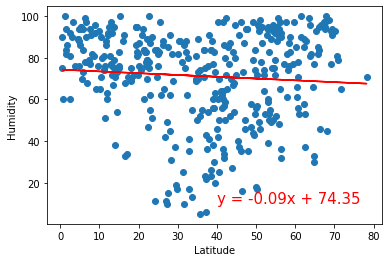

In [18]:
# Northern Hemisphere
compute_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity',40,10)

The r-value is: -0.12895080318785795


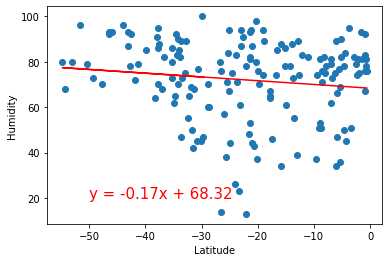

In [19]:
# Southern Hemisphere
compute_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity',-50,20)

**Discussion about the linear relationship:
In both hemispheres, there does not seem to be a correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03333593207721271


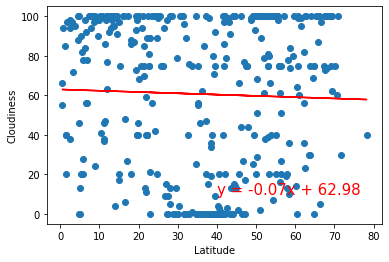

In [20]:
# Northern Hemisphere
compute_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness',40,10)

The r-value is: -0.1861904792908704


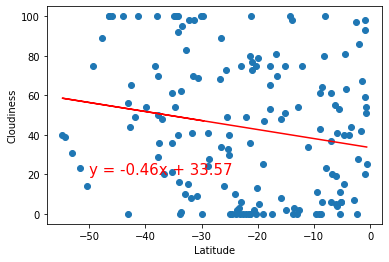

In [21]:
# Southern Hemisphere
compute_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness',-50,20)


**Discussion about the linear relationship:
In both hemispheres, there does not seem to be a correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06835770372437792


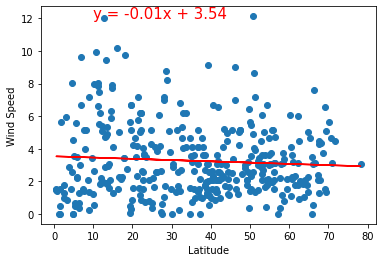

In [22]:
# Northern Hemisphere
compute_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed',10,12)

The r-value is: 0.03213002239853921


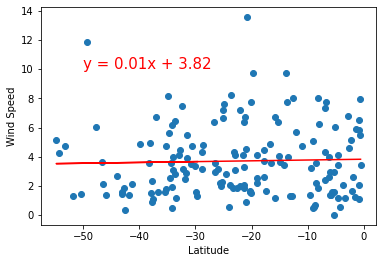

In [23]:
# Southern Hemisphere
compute_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed',-50,10)

**Discussion about the linear relationship:
In both hemispheres, there does not seem to be a correlation between latitude and Wind Speed.